In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
from scipy import stats

## Mean &plusmn; z Standard Deviations (Empirical) ##

For data having a BELL-SHAPED and SYMMETRIC distribution:

- Approximately 68% of the data values is within one standard deviation of the mean.
- Approximately 95% of the data values is within two standard deviations of the mean.
- Approximately more than 99% of the data is within three standard deviations of the mean.


**This is known as the Empirical Rule.**

- It is important to note that this rule only applies when the shape of the distribution of the data is bell-shaped and symmetric. 

- A distribution that is bell-shaped and symmetric about the mean(=median=mode) is said to have the a "Normal" or "Gaussian" probability distribution.			


## An example to illustrate the empirical rule. ##

In [2]:
# Read in a sample data set.

births = Table.read_table('baby.csv')
births.take(np.arange(3))

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


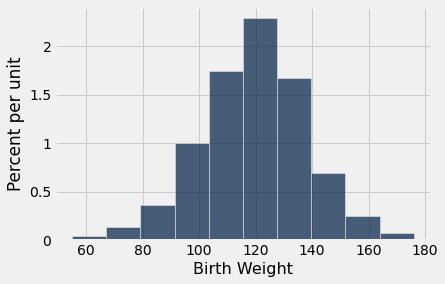

In [3]:
# Observe the distribution of the numerical variable: Birth Weight.

births.hist('Birth Weight')

## Does the distribution above meet the speculations of the Empirical Rule? ##

In [4]:
# See how Chebyshev's bounds work for Birth Weight
    
birth_weight = births.column('Birth Weight')
mean = np.mean(birth_weight)
sd = np.std(birth_weight)
print()
print('Birth Weight')

for z in make_array(1, 2, 3):
    chosen = births.where('Birth Weight', are.between(mean - z*sd, mean + z*sd))
    proportion = chosen.num_rows / births.num_rows
    percent = round(proportion * 100, 2)
    print('Average plus or minus', z, 'SDs:', percent, '% of the data')


Birth Weight
Average plus or minus 1 SDs: 69.25 % of the data
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.57 % of the data


## For a normal distribution(with the mean and standard deviation known), can we find the EXACT(theoretical) proportions of data values within a number of standard deviatons of the mean? ##

The distribution of passenger vehicle speeds traveling on the Interstate 5 Freeway (I-5) in California is nearly normal 
with a mean of 72.6 miles/hour and a standard deviation of 4.78 miles/hour. 

[a.] What percent of passenger vehicles travel slower than 80 miles/hour?


0.939202953722


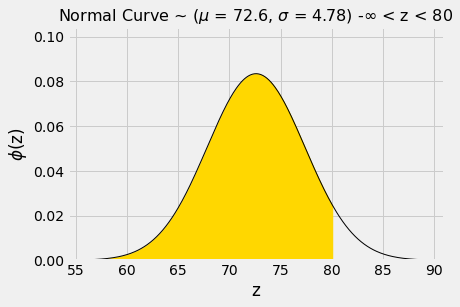

In [5]:
print(stats.norm.cdf(80, loc=72.6, scale=4.78)) # loc =  mean, scale =standard deviation.
plot_normal_cdf(rbound = 80, mean = 72.6, sd = 4.78)

[b]. The speed limit on this stretch of the I-5 is 70 miles hour. Approximate what percentage of the passenger vehicles travel above the speed limit on this stretch of the I-5.

0.706756229098


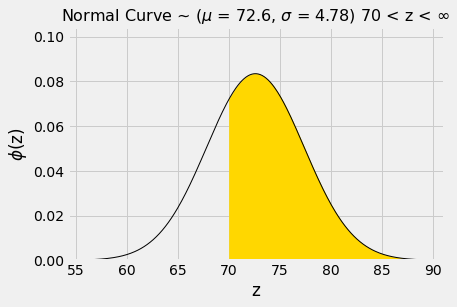

In [6]:
print(1-stats.norm.cdf(70, loc=72.6, scale=4.78)) # loc =  mean, scale =standard deviation.
plot_normal_cdf(lbound = 70, mean = 72.6, sd = 4.78)

[c.] What percent of passenger vehicles travel between 60 and 80 miles/hour?

0.939202953722 minus 0.00419469346435 is equal to: 0.935008260257


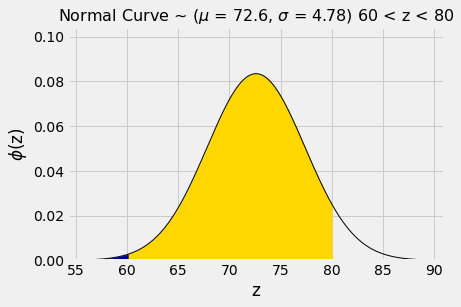

In [7]:
print(stats.norm.cdf(80, loc=72.6, scale=4.78), "minus", stats.norm.cdf(60, loc=72.6, scale=4.78), "is equal to:",
      stats.norm.cdf(80, loc=72.6, scale=4.78) - stats.norm.cdf(60, loc=72.6, scale=4.78))

plot_normal_cdf(lbound = 60, rbound = 80, mean = 72.6, sd = 4.78)

## The Central Limit Theorem ##

The Central Limit Theorem says that the probability distribution of the sum or average of a large random sample drawn *with replacement* will be roughly normal, regardless of the distribution of the population from which the sample is drawn.

- What makes the Central Limit Theorem very powerful is that its results that can be applied to random samples regardless of the distribution of the population.

- Note that in data science we rarely know the distribution of the parent population.
- We consider an example to illustrate the results of the Central Limit Theorem.

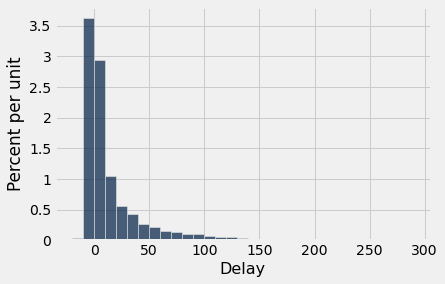

In [8]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [9]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [10]:
def one_sample_mean(sample_size):
    """ Takes a sample from the population of flights and computes its mean"""
    sampled_flights = united.sample(sample_size) # Take a sample of a given size with replacement.
    return np.mean(sampled_flights.column('Delay'))

In [11]:
one_sample_mean(25)

12.16

In [12]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [13]:
sample_means_25 = ten_thousand_sample_means(25)

Population Average: 16.6581555154


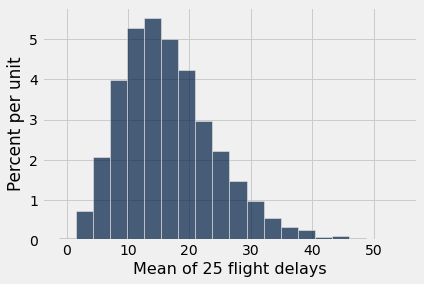

In [14]:
Table().with_column('Mean of 25 flight delays', sample_means_25).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.6581555154


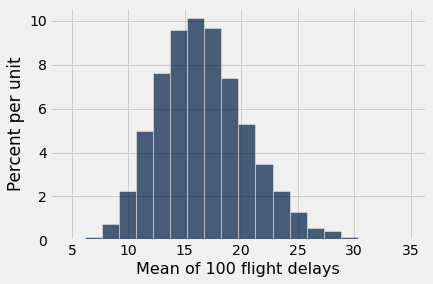

In [15]:
sample_means_100 = ten_thousand_sample_means(100)
Table().with_column('Mean of 100 flight delays', sample_means_100).hist(bins=20)
print('Population Average:', delay_mean)

Population Average: 16.6581555154


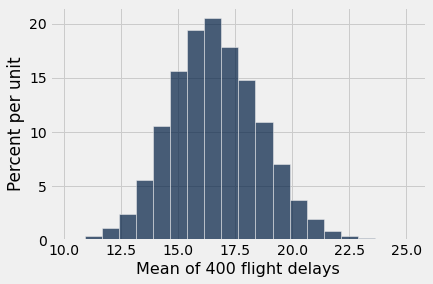

In [16]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', delay_mean)

Population Average: 16.6581555154


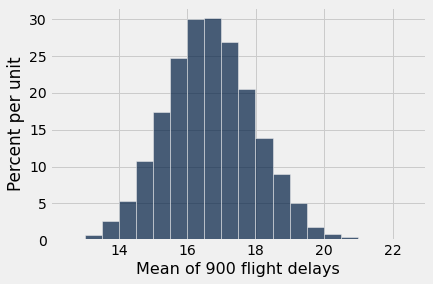

In [17]:
sample_means_900 = ten_thousand_sample_means(900)
Table().with_column('Mean of 900 flight delays', sample_means_900).hist(bins=20)
print('Population Average:', delay_mean)

## Comparing the Distributions of the Sample Average for Different Sample Sizes ##

In [31]:
means_tbl = Table().with_columns(
    '25',  sample_means_25,
    '100', sample_means_100,
    '400', sample_means_400,
    '900', sample_means_900,
)

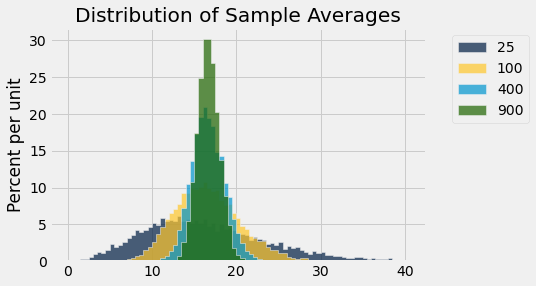

In [19]:
means_tbl.hist(bins = np.arange(0, 41, 0.5))
plots.title('Distribution of Sample Averages');

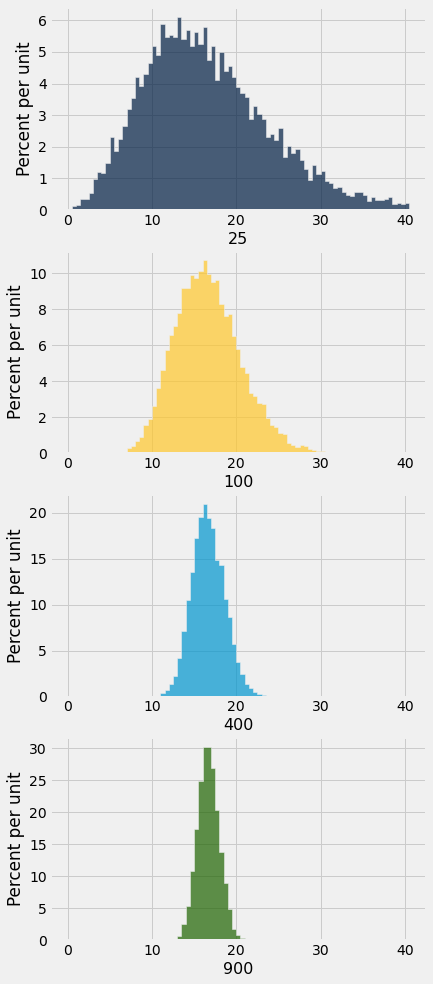

In [20]:
means_tbl.hist(bins = np.arange(0, 41, 0.5), overlay=False)

## Properties of the Distribution of the Sample Average ##

In what way is the **Population Standard Deviation** related to the **size of the samples drawn each time** and the **standard error of the sampling distribution of the sample means?**

In [21]:
# Recall the population parameters.

delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

To understand the properties of the distribution of the sample averages, we would like to define a utility function that returns

- the size of each of 10,000 bootstrap resamples of an original sample
- the population mean
- the mean/average of all mean delay times computed for each of 10,000 bootstrap resamples of an original sample
- the population standard deviation
- the standard deviation of all mean delay times computed for each of 10,000 bootstrap resamples of an original sample
- the histogram of all mean delay times computed for each of 10,000 bootstrap resamples of an original sample

In [22]:
"""Empirical distribution of random sample means"""

def plot_and_summarize_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  25
Population mean: 16.6581555154
Average of sample means:  16.626644
Population SD: 39.4801998516
SD of sample means: 7.88011595963


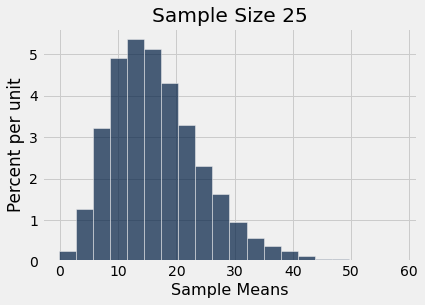

In [23]:
plot_and_summarize_sample_means(25)

In [24]:
39.48 / 7.97

4.95357590966123

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.632697
Population SD: 39.4801998516
SD of sample means: 3.97489284839


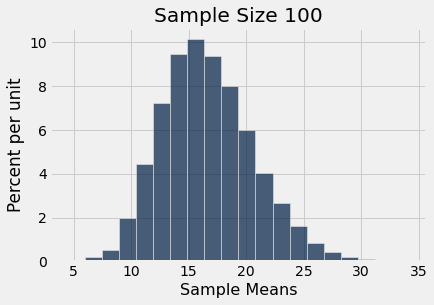

In [25]:
plot_and_summarize_sample_means(100)

In [26]:
39.48 / 3.932

10.040691759918616

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.63342025
Population SD: 39.4801998516
SD of sample means: 1.98247767989


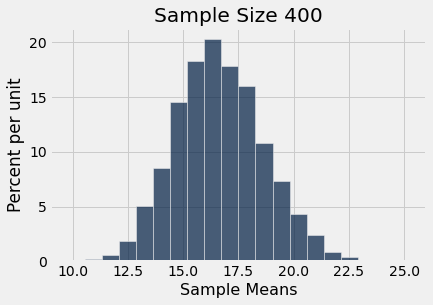

In [27]:
plot_and_summarize_sample_means(400)

In [28]:
39.48 / 1.973

20.010136847440442

Sample size:  900
Population mean: 16.6581555154
Average of sample means:  16.6551305556
Population SD: 39.4801998516
SD of sample means: 1.32374229486


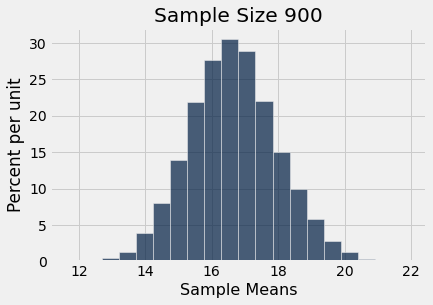

In [29]:
plot_and_summarize_sample_means(900)

In [30]:
39.48 / 1.305

30.25287356321839

What conclusions can be derived from above?